In [6]:
%matplotlib inline
import seaborn
import numpy as np
import matplotlib.pyplot as plt

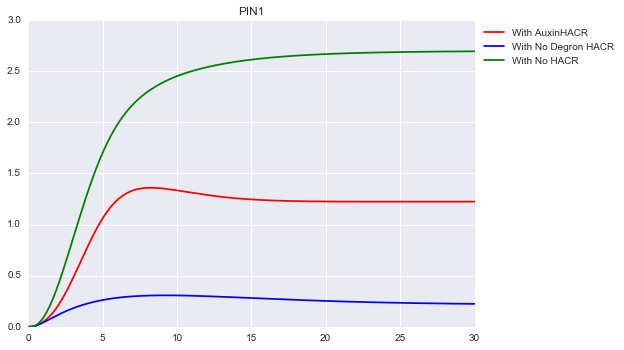

In [21]:
Initial_conditions = [0,0,0,0,0]
Variable_labels = ['PIN1m','AuxinHACRm','PIN1','AuxinHACR','Auxin']
Start_time = 0
Stop_time = 30
Steps = 1000

PHI_PIN1m = 1
THETA_PIN1m = 1
PHI_AuxinHACRm = 1
HACR_Repression_strength = 10
DELTA_PIN1 = 1
MEW_PIN1 = 0.1
DELTA_AuxinHACR = 2
MEW_AuxinHACR = 0.1
k_degradation_rate = 5
Auxin_diffusion_in = 1
Auxin_diffusion_out = 0.01
k_PIN1_transport_efficiency = 1
Auxin_Activation = 1
User_defined_parameters = [PHI_PIN1m,THETA_PIN1m,PHI_AuxinHACRm,HACR_Repression_strength,DELTA_PIN1,MEW_PIN1,DELTA_AuxinHACR,MEW_AuxinHACR,k_degradation_rate,Auxin_diffusion_in,Auxin_diffusion_out,k_PIN1_transport_efficiency,Auxin_Activation]


def Basic_AuxinHACR_regulated_PIN1_model(x,t,User_defined_parameters=User_defined_parameters):
    
    [PIN1m,AuxinHACRm,PIN1,AuxinHACR,Auxin] = x
    
    # Constants in the ODEs
    PHI_PIN1m = User_defined_parameters[0]
    THETA_PIN1m = User_defined_parameters[1]
    PHI_AuxinHACRm = User_defined_parameters[2]
    HACR_Repression_strength = User_defined_parameters[3]
    DELTA_PIN1 = User_defined_parameters[4]
    MEW_PIN1 = User_defined_parameters[5]
    DELTA_AuxinHACR = User_defined_parameters[6]
    MEW_AuxinHACR = User_defined_parameters[7]
    k_degradation_rate = User_defined_parameters[8]
    Auxin_diffusion_in = User_defined_parameters[9]
    Auxin_diffusion_out = User_defined_parameters[10]
    k_PIN1_transport_efficiency = User_defined_parameters[11]
    Auxin_Activation = User_defined_parameters[12]
        
    #mRNA ODEs
    dPIN1mdt = PHI_PIN1m*((Auxin_Activation*Auxin)/(Auxin_Activation*Auxin + THETA_PIN1m + HACR_Repression_strength*AuxinHACR) - PIN1m)
    dAuxinHACRmdt = PHI_AuxinHACRm*(1 - AuxinHACRm)
    
    #protein ODEs 
    dPIN1dt = DELTA_PIN1*PIN1m - MEW_PIN1*PIN1
    dAuxinHACRdt = DELTA_AuxinHACR*AuxinHACRm - MEW_AuxinHACR*AuxinHACR - k_degradation_rate*Auxin*AuxinHACR
    
    #Auxin odes
    dAuxindt = Auxin_diffusion_in - Auxin_diffusion_out*Auxin - PIN1*k_PIN1_transport_efficiency*Auxin

    dxdt = [dPIN1mdt,dAuxinHACRmdt,dPIN1dt,dAuxinHACRdt,dAuxindt]
        
    return dxdt

def Basic_NoDegronHACR_regulated_PIN1_model(x,t,User_defined_parameters=User_defined_parameters):
    [PIN1m,AuxinHACRm,PIN1,AuxinHACR,Auxin] = x

    # Constants in the ODEs
    PHI_PIN1m = User_defined_parameters[0]
    THETA_PIN1m = User_defined_parameters[1]
    PHI_AuxinHACRm = User_defined_parameters[2]
    HACR_Repression_strength = User_defined_parameters[3]
    DELTA_PIN1 = User_defined_parameters[4]
    MEW_PIN1 = User_defined_parameters[5]
    DELTA_AuxinHACR = User_defined_parameters[6]
    MEW_AuxinHACR = User_defined_parameters[7]
    k_degradation_rate = User_defined_parameters[8]
    Auxin_diffusion_in = User_defined_parameters[9]
    Auxin_diffusion_out = User_defined_parameters[10]
    k_PIN1_transport_efficiency = User_defined_parameters[11]
    Auxin_Activation = User_defined_parameters[12]
        
    #mRNA ODEs
    dPIN1mdt = PHI_PIN1m*((Auxin_Activation*Auxin)/(Auxin_Activation*Auxin + THETA_PIN1m + HACR_Repression_strength*AuxinHACR) - PIN1m)
    dAuxinHACRmdt = PHI_AuxinHACRm*(1 - AuxinHACRm)
    
    #protein ODEs 
    dPIN1dt = DELTA_PIN1*PIN1m - MEW_PIN1*PIN1
    dAuxinHACRdt = DELTA_AuxinHACR*AuxinHACRm - MEW_AuxinHACR*AuxinHACR
    
    #Auxin odes
    dAuxindt = Auxin_diffusion_in - Auxin_diffusion_out*Auxin - PIN1*k_PIN1_transport_efficiency*Auxin

    dxdt = [dPIN1mdt,dAuxinHACRmdt,dPIN1dt,dAuxinHACRdt,dAuxindt]
        
    return dxdt

def Basic_unregulated_PIN1_model(x,t,User_defined_parameters=User_defined_parameters):
    [PIN1m,AuxinHACRm,PIN1,AuxinHACR,Auxin] = x

    # Constants in the ODEs
    PHI_PIN1m = User_defined_parameters[0]
    THETA_PIN1m = User_defined_parameters[1]
    PHI_AuxinHACRm = User_defined_parameters[2]
    HACR_Repression_strength = User_defined_parameters[3]
    DELTA_PIN1 = User_defined_parameters[4]
    MEW_PIN1 = User_defined_parameters[5]
    DELTA_AuxinHACR = User_defined_parameters[6]
    MEW_AuxinHACR = User_defined_parameters[7]
    k_degradation_rate = User_defined_parameters[8]
    Auxin_diffusion_in = User_defined_parameters[9]
    Auxin_diffusion_out = User_defined_parameters[10]
    k_PIN1_transport_efficiency = User_defined_parameters[11]
    Auxin_Activation = User_defined_parameters[12]
        
    #mRNA ODEs
    dPIN1mdt = PHI_PIN1m*((Auxin_Activation*Auxin)/(Auxin_Activation*Auxin + THETA_PIN1m) - PIN1m)
    dAuxinHACRmdt = 0
    
    #protein ODEs 
    dPIN1dt = DELTA_PIN1*PIN1m - MEW_PIN1*PIN1
    dAuxinHACRdt = 0
    
    #Auxin odes
    dAuxindt = Auxin_diffusion_in - Auxin_diffusion_out*Auxin - PIN1*k_PIN1_transport_efficiency*Auxin

    dxdt = [dPIN1mdt,dAuxinHACRmdt,dPIN1dt,dAuxinHACRdt,dAuxindt]
        
    return dxdt

def Simulate_ODEs(Initial_conditions,Start_time,Stop_time,Steps,Variable_labels,Variables_to_plot=[]):
    import numpy as np
    import pandas as pd
    from scipy.integrate import odeint
    
    #creating time vector
    time = np.linspace(Start_time,Stop_time,Steps)
    
    #simulating ODEs
    x=odeint(Basic_AuxinHACR_regulated_PIN1_model,Initial_conditions,time)
    y=odeint(Basic_NoDegronHACR_regulated_PIN1_model,Initial_conditions,time)
    z=odeint(Basic_unregulated_PIN1_model,Initial_conditions,time)

    #plotting simulation
    if Variables_to_plot == []:
        for i in range(len(Variable_labels)):
            plt.figure(i)
            plt.plot(time,x[:,i],'-r',label='With AuxinHACR')
            plt.plot(time,y[:,i],'--b',label='With No Degron HACR')
            plt.plot(time,z[:,i],'-.g',label='With No HACR')
            plt.title(Variable_labels[i])
            plt.legend(bbox_to_anchor=(1, 1), loc=2)

    else:
        for i in Variables_to_plot:
            plt.figure(i)
            plt.plot(time,x[:,i],'-r',label='With AuxinHACR')
            plt.plot(time,y[:,i],'-b',label='With No Degron HACR')
            plt.plot(time,z[:,i],'-g',label='With No HACR')
            plt.legend(bbox_to_anchor=(1, 1), loc=2)
            plt.title(Variable_labels[i])
            plt.savefig('/Users/arjun/Google Drive/HDCTF/Figures/180415_PIN1_Model_fig1.svg')
    return 



Simulate_ODEs(Initial_conditions,Start_time,Stop_time,Steps,Variable_labels,[2])


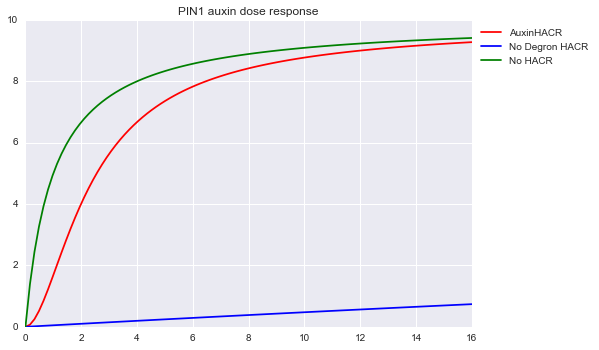

In [20]:
# Static auxin concentrations dose response

Variable_labels = ['PIN1m','AuxinHACRm','PIN1','AuxinHACR','Auxin']
Start_time = 0
Stop_time = 100
Steps = 1000

PHI_PIN1m = 1
THETA_PIN1m = 1
PHI_AuxinHACRm = 1
HACR_Repression_strength = 10
DELTA_PIN1 = 1
MEW_PIN1 = 0.1
DELTA_AuxinHACR = 2
MEW_AuxinHACR = 0.1
k_degradation_rate = 5
Auxin_diffusion_in = 1
Auxin_diffusion_out = 0.01
k_PIN1_transport_efficiency = 1
Auxin_Activation = 1
User_defined_parameters = [PHI_PIN1m,THETA_PIN1m,PHI_AuxinHACRm,HACR_Repression_strength,DELTA_PIN1,MEW_PIN1,DELTA_AuxinHACR,MEW_AuxinHACR,k_degradation_rate,Auxin_diffusion_in,Auxin_diffusion_out,k_PIN1_transport_efficiency,Auxin_Activation]

auxin_AuxinHACR_regulated = []
PIN1_AuxinHACR_regulated = []
auxin_NoDegronHACR_regulated = []
PIN1_NoDegronHACR_regulated = []
auxin_NoHACR_regulated = []
PIN1_NoHACR_regulated = []


for i in np.linspace(0,16,100):
    Initial_conditions = [0,0,0,0,i]

    def Basic_AuxinHACR_regulated_PIN1_model(x,t,User_defined_parameters=User_defined_parameters):

        [PIN1m,AuxinHACRm,PIN1,AuxinHACR,Auxin] = x

        # Constants in the ODEs
        PHI_PIN1m = User_defined_parameters[0]
        THETA_PIN1m = User_defined_parameters[1]
        PHI_AuxinHACRm = User_defined_parameters[2]
        HACR_Repression_strength = User_defined_parameters[3]
        DELTA_PIN1 = User_defined_parameters[4]
        MEW_PIN1 = User_defined_parameters[5]
        DELTA_AuxinHACR = User_defined_parameters[6]
        MEW_AuxinHACR = User_defined_parameters[7]
        k_degradation_rate = User_defined_parameters[8]
        Auxin_diffusion_in = User_defined_parameters[9]
        Auxin_diffusion_out = User_defined_parameters[10]
        k_PIN1_transport_efficiency = User_defined_parameters[11]
        Auxin_Activation = User_defined_parameters[12]

        #mRNA ODEs
        dPIN1mdt = PHI_PIN1m*((Auxin_Activation*Auxin)/(Auxin_Activation*Auxin + THETA_PIN1m + HACR_Repression_strength*AuxinHACR) - PIN1m)
        dAuxinHACRmdt = PHI_AuxinHACRm*(1 - AuxinHACRm)

        #protein ODEs 
        dPIN1dt = DELTA_PIN1*PIN1m - MEW_PIN1*PIN1
        dAuxinHACRdt = DELTA_AuxinHACR*AuxinHACRm - MEW_AuxinHACR*AuxinHACR - k_degradation_rate*Auxin*AuxinHACR

        #Auxin odes
        dAuxindt = 0

        dxdt = [dPIN1mdt,dAuxinHACRmdt,dPIN1dt,dAuxinHACRdt,dAuxindt]

        return dxdt

    def Basic_NoDegronHACR_regulated_PIN1_model(x,t,User_defined_parameters=User_defined_parameters):
        [PIN1m,AuxinHACRm,PIN1,AuxinHACR,Auxin] = x

        # Constants in the ODEs
        PHI_PIN1m = User_defined_parameters[0]
        THETA_PIN1m = User_defined_parameters[1]
        PHI_AuxinHACRm = User_defined_parameters[2]
        HACR_Repression_strength = User_defined_parameters[3]
        DELTA_PIN1 = User_defined_parameters[4]
        MEW_PIN1 = User_defined_parameters[5]
        DELTA_AuxinHACR = User_defined_parameters[6]
        MEW_AuxinHACR = User_defined_parameters[7]
        k_degradation_rate = User_defined_parameters[8]
        Auxin_diffusion_in = User_defined_parameters[9]
        Auxin_diffusion_out = User_defined_parameters[10]
        k_PIN1_transport_efficiency = User_defined_parameters[11]
        Auxin_Activation = User_defined_parameters[12]

        #mRNA ODEs
        dPIN1mdt = PHI_PIN1m*((Auxin_Activation*Auxin)/(Auxin_Activation*Auxin + THETA_PIN1m + HACR_Repression_strength*AuxinHACR) - PIN1m)
        dAuxinHACRmdt = PHI_AuxinHACRm*(1 - AuxinHACRm)

        #protein ODEs 
        dPIN1dt = DELTA_PIN1*PIN1m - MEW_PIN1*PIN1
        dAuxinHACRdt = DELTA_AuxinHACR*AuxinHACRm - MEW_AuxinHACR*AuxinHACR

        #Auxin odes
        dAuxindt = 0

        dxdt = [dPIN1mdt,dAuxinHACRmdt,dPIN1dt,dAuxinHACRdt,dAuxindt]

        return dxdt

    def Basic_unregulated_PIN1_model(x,t,User_defined_parameters=User_defined_parameters):
        [PIN1m,AuxinHACRm,PIN1,AuxinHACR,Auxin] = x

        # Constants in the ODEs
        PHI_PIN1m = User_defined_parameters[0]
        THETA_PIN1m = User_defined_parameters[1]
        PHI_AuxinHACRm = User_defined_parameters[2]
        HACR_Repression_strength = User_defined_parameters[3]
        DELTA_PIN1 = User_defined_parameters[4]
        MEW_PIN1 = User_defined_parameters[5]
        DELTA_AuxinHACR = User_defined_parameters[6]
        MEW_AuxinHACR = User_defined_parameters[7]
        k_degradation_rate = User_defined_parameters[8]
        Auxin_diffusion_in = User_defined_parameters[9]
        Auxin_diffusion_out = User_defined_parameters[10]
        k_PIN1_transport_efficiency = User_defined_parameters[11]
        Auxin_Activation = User_defined_parameters[12]

        #mRNA ODEs
        dPIN1mdt = PHI_PIN1m*((Auxin_Activation*Auxin)/(Auxin_Activation*Auxin + THETA_PIN1m) - PIN1m)
        dAuxinHACRmdt = 0

        #protein ODEs 
        dPIN1dt = DELTA_PIN1*PIN1m - MEW_PIN1*PIN1
        dAuxinHACRdt = 0

        #Auxin odes
        dAuxindt = 0

        dxdt = [dPIN1mdt,dAuxinHACRmdt,dPIN1dt,dAuxinHACRdt,dAuxindt]

        return dxdt

    def Simulate_ODEs(Initial_conditions,Start_time,Stop_time,Steps,Variable_labels,Variables_to_plot=[]):
        import numpy as np
        import pandas as pd
        from scipy.integrate import odeint

        #creating time vector
        time = np.linspace(Start_time,Stop_time,Steps)

        #simulating ODEs
        x=odeint(Basic_AuxinHACR_regulated_PIN1_model,Initial_conditions,time)
        y=odeint(Basic_NoDegronHACR_regulated_PIN1_model,Initial_conditions,time)
        z=odeint(Basic_unregulated_PIN1_model,Initial_conditions,time)

        auxin_AuxinHACR_regulated.append(x[(Steps-1),4])
        PIN1_AuxinHACR_regulated.append(x[(Steps-1),2])
        auxin_NoDegronHACR_regulated.append(y[(Steps-1),4])
        PIN1_NoDegronHACR_regulated.append(y[(Steps-1),2])
        auxin_NoHACR_regulated.append(z[(Steps-1),4])
        PIN1_NoHACR_regulated.append(z[(Steps-1),2])

        
        return 
    Simulate_ODEs(Initial_conditions,Start_time,Stop_time,Steps,Variable_labels,Variables_to_plot=[])

plt.figure
plt.plot(auxin_AuxinHACR_regulated,PIN1_AuxinHACR_regulated,'-r',label='AuxinHACR')
plt.plot(auxin_NoDegronHACR_regulated,PIN1_NoDegronHACR_regulated,'-b',label='No Degron HACR')
plt.plot(auxin_NoHACR_regulated,PIN1_NoHACR_regulated,'-g',label='No HACR')
plt.title('PIN1 auxin dose response')
plt.legend(bbox_to_anchor=(1, 1), loc=2)
plt.savefig('/Users/arjun/Google Drive/HDCTF/Figures/180415_PIN1_Model_fig2.svg')
